In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [7]:
setwd('/import/DB/fel/BJTC-204')

In [8]:
load('./ene.rda')

In [9]:
load('buik2_s.rda')

In [10]:
ls()

[1] "cliinfo" "count"   "ene"     "exp"     "group"

In [11]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [12]:
expr = exp[ene,] %>% tibble::rownames_to_column(.,'Gene')

hg_len = 'All_hg19gene_len.txt'

len = read.table(hg_len,header =T,sep = '\t')
library(tidyverse)
library(dplyr)
merge<-left_join(expr,len,by="Gene")
merge <- na.omit(merge)#删除错误值行​
rownames(merge)<-merge[,1]


merge<-merge[,-1]
head(merge)#最后一列Length是基因长度​
kb <- merge$Length/1000
dim(merge)
countdata <- merge[,1:dim(merge)[2]-1]
rpk <- countdata /kb
tpm <- log2(t(t(rpk)/colSums(rpk) * 1000000)+1)

fpkm <- log2(t(t(rpk)/colSums(countdata) * 10^6)+1)
head(fpkm)

expr = fpkm %>% t() %>%  as.data.frame()

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V31,V38,V41,V48,V50,V51,V54,V55,V56,Length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ANGEL2,657.115725,609.00637,759.00778,744.8014516,705.176831,612.97452,727.4426933,448.5768640,590.7819960,552.14449,...,669.376352,714.863252,739.04548,753.005268,745.821958,694.703002,645.644824,817.8152171,745.140357,7276
SLC47A2,14.934448,26.20724,26.71707,12.2932511,11.560276,16.82675,20.4249568,40.7797149,21.1641452,23.29724,...,35.768202,37.311961,20.64771,22.973042,40.173080,29.886840,36.719137,19.9153745,23.863582,6691
TNMD,1.493445,0.00000,0.00000,0.8478104,1.445034,0.00000,1.5711505,0.8865155,1.2093797,0.00000,...,1.459927,1.695998,1.42398,3.403414,1.746656,1.992456,3.059928,1.9272943,1.193179,1610
MFSD11,252.392176,269.56019,259.88426,208.5613626,232.650553,249.99745,251.3840841,192.3738725,256.9931917,195.69678,...,294.905176,258.639729,275.54008,312.263202,300.424770,263.004196,248.874150,283.9546944,322.754950,6587
HSD17B2,0.000000,0.00000,0.00000,0.4239052,0.000000,0.00000,0.7855753,2.6595466,0.6046899,0.00000,...,0.000000,0.000000,1.42398,2.552560,3.493311,0.664152,0.000000,0.6424314,0.000000,9550
COX19,140.383814,131.03621,117.79801,136.9213824,114.157725,108.17197,134.3333699,134.7503623,123.9614219,160.75093,...,127.013615,106.847888,126.73420,105.505823,120.519239,131.502098,135.656811,149.6865244,147.357621,5542


[1] 45 60

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V28,V31,V38,V41,V48,V50,V51,V54,V55,V56
ANGEL2,11.313799,11.381373,11.386389,11.279204,11.472802,11.377584,11.547784,10.047814,11.212222,11.329168,...,11.957018,11.731544,11.334778,11.678731,11.349663,11.600271,11.915479,10.957193,12.305200,11.959608
SLC47A2,5.997484,6.974851,6.692509,5.510627,5.690687,6.329025,6.529499,6.721677,6.545138,6.894889,...,8.049924,7.633260,7.204998,6.652023,6.451961,7.514113,7.505179,6.952946,7.076745,7.125906
TNMD,4.762127,0.000000,0.000000,3.784498,4.771456,0.000000,4.917078,3.384732,4.519786,0.000000,...,5.015650,5.108852,4.842112,4.884474,5.762485,5.081062,5.674023,5.444958,5.778471,4.897990
MFSD11,10.077611,10.349612,9.984553,9.587639,10.017391,10.227856,10.159148,8.971409,10.155507,9.977137,...,11.093266,10.692949,10.012418,10.399483,10.223943,10.432547,10.658212,9.726371,10.923068,10.896454
HSD17B2,0.000000,0.000000,0.000000,1.054683,0.000000,0.000000,1.791782,2.530287,1.510649,0.000000,...,0.000000,0.000000,0.000000,2.538794,2.951841,3.594065,1.930907,0.000000,2.010197,0.000000
COX19,9.481220,9.558993,9.093433,9.230258,9.240464,9.269620,9.505012,8.707578,9.353824,9.942594,...,10.426456,9.727727,8.987694,9.529127,8.909514,9.365166,9.908037,9.101057,10.249009,10.015189


In [13]:
head(expr,2)

,ANGEL2,SLC47A2,TNMD,MFSD11,HSD17B2,COX19,SNTG2,WDR72,TEF,KRBOX4,...,MMD2,HSD17B6,GLUL,PRF1,ITGB5,ACSBG1,PPP1R3G,SLCO1C1,SLC25A33,EZR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,11.31380,5.997484,4.762127,10.07761,0,9.481220,3.380686,0,12.57796,9.953742,...,11.02428,10.07038,15.64456,6.075159,10.21540,10.90177,7.430492,11.48960,11.21745,12.45869
V2,11.38137,6.974851,0.000000,10.34961,0,9.558993,6.491342,0,12.85425,10.305160,...,11.45453,10.74483,15.57598,5.994629,10.18809,10.88782,7.779866,11.51256,11.12242,12.72249


In [14]:
group

[1] "control" "control" "control" "control" "control" "control" "control"
 [8] "control" "control" "control" "control" "control" "control" "control"
[15] "control" "control" "control" "control" "control" "control" "control"
[22] "control" "control" "control" "control" "control" "control" "control"
[29] "control" "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[36] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[43] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[50] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[57] "MDD"     "MDD"     "MDD"

In [15]:
type = ifelse(group == 'MDD',1,0)

In [16]:
y = type

In [17]:
colnames(expr) = gsub('-','.',colnames(expr))

In [18]:
#expr <- expr[, !grepl("^\\d+", names(expr))]

In [19]:
library(dplyr)

In [20]:
x = as.matrix(expr)
y = y

In [21]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




In [23]:
library(dplyr)

In [24]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [25]:
colnames(expr3)[1] = 'Group'

In [26]:
expr4 = expr3 

In [27]:
dim(expr4)

[1] 59 46

In [28]:
data = expr3[,c('Group','SNTG2','WDR72','TEF')]

Setting levels: control = 0, case = 1

Setting direction: controls < cases



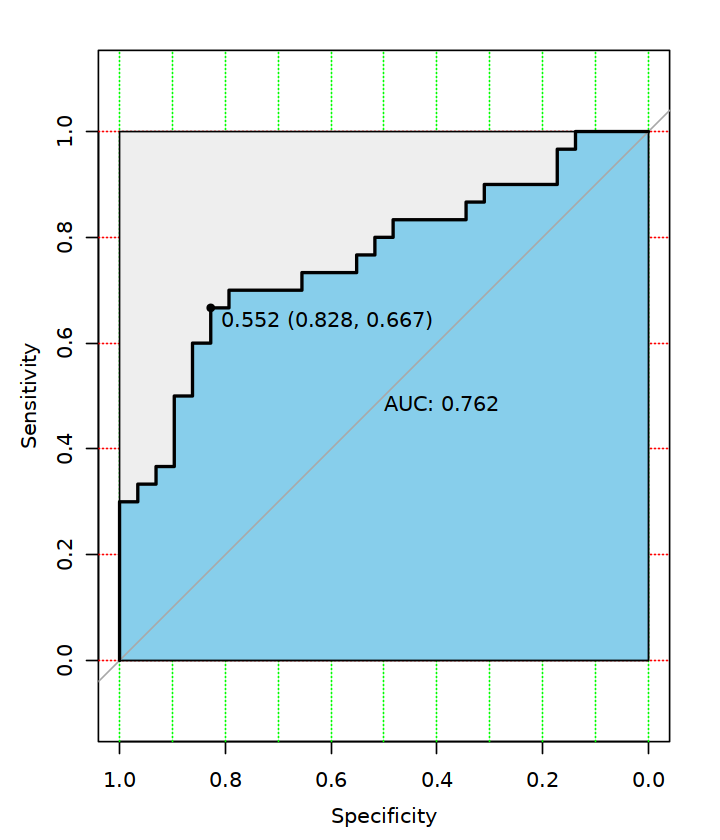

In [29]:
fold_pre <- glm(Group~.,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [30]:
fold_pre <- glm(Group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [31]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




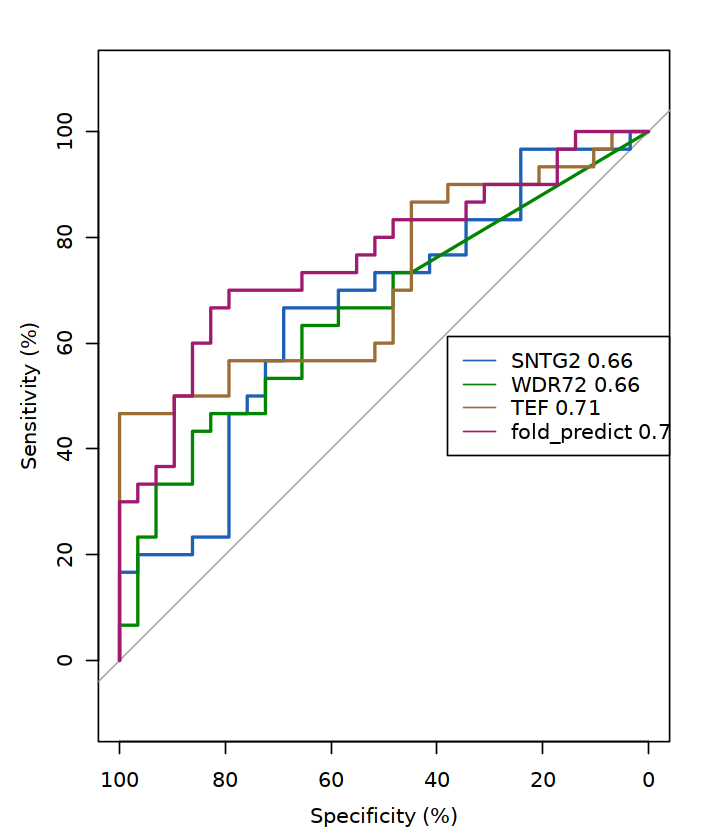

In [32]:
rocobj1 <- plot.roc(data$Group, data$SNTG2,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$WDR72,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TEF,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")

rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")

legend("right", legend=c(paste0("SNTG2 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("WDR72 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TEF ", round(rocobj3$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)